Populating the interactive namespace from numpy and matplotlib


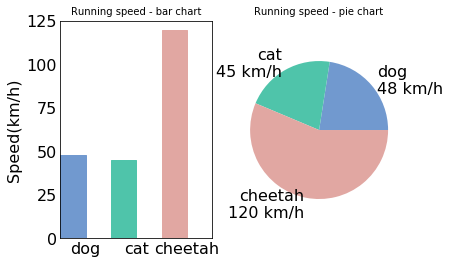

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%pylab inline

# rcParams 设置全局字体
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

fig = plt.figure('Bar chart & Pie chart')

ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')

xticks = np.arange(3)

bar_width = 0.5

animals = speed_map.keys()
speeds = [x[0] for x in speed_map.values()]
colors = [x[1] for x in speed_map.values()]
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')

ax.set_ylabel('Speed(km/h)')
ax.set_xticks(xticks+bar_width/2)
ax.set_xticklabels(animals)
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])
ax.set_ylim([0, 125])

for bar, color in zip(bars, colors):
    bar.set_color(color)

ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')

labels = ['{}\n{} km/h'.format(a, s) for a, s in zip(animals, speeds)]

ax.pie(speeds, labels=labels, colors=colors)

plt.axis('equal')
plt.show()

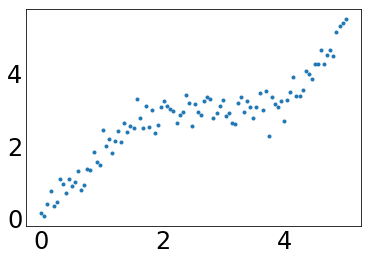

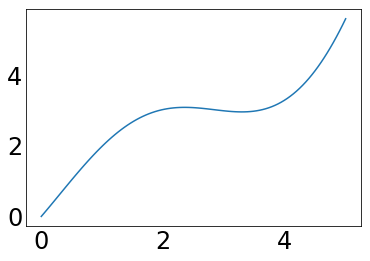

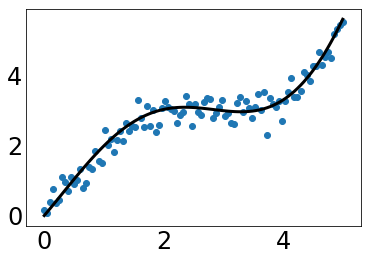

In [2]:
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

np.random.seed(42)

x = np.linspace(0, 5, 100)
y = 2*np.sin(x) + 0.3*x**2
y_data = y + np.random.normal(scale=0.3, size=100)

plt.figure('data')
plt.plot(x, y_data, '.')

plt.figure('model')
plt.plot(x, y)

plt.figure('data & model')
plt.plot(x, y, 'k', lw=3)
plt.scatter(x, y_data)

plt.show()

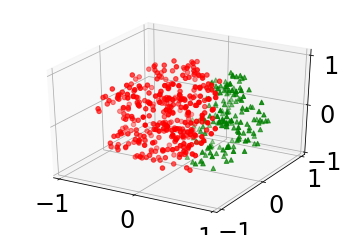

In [3]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

n_samples = 500
dim = 3

samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []
for x, y, z in samples:
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))

fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

In [5]:
random.seed(42)

n_tests = 10000

winning_doors = random.randint(0, 3, n_tests)
change_mind_wins = 0
insist_wins = 0

for winning_door in winning_doors:

    first_try = random.randint(0, 3)
    remaining_choices = [i for i in range(3) if i != first_try]
    wrong_choices = [i for i in range(3) if i != winning_door]

    if first_try in wrong_choices:
        wrong_choices.remove(first_try)
    
    screened_out = random.choice(wrong_choices)
    remaining_choices.remove(screened_out)
    
    changed_mind_try = remaining_choices[0]

    change_mind_wins += 1 if changed_mind_try == winning_door else 0
    insist_wins += 1 if first_try == winning_door else 0

print(
    'You win {1} out of {0} tests if you changed your mind\n'
    'You win {2} out of {0} tests if you insist on the initial choice'.format(
        n_tests, change_mind_wins, insist_wins
        )
)

You win 6616 out of 10000 tests if you changed your mind
You win 3384 out of 10000 tests if you insist on the initial choice
